<a href="https://colab.research.google.com/github/gabrielalastra/TwitterAPI_COVID_2022/blob/main/data_analysis_english_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from wordcloud import WordCloud
from PIL import Image

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


<hr color='cian'>
<h4 align='right'>Open the data</h4>

In [2]:
path= '/content/drive/MyDrive/Colab Notebooks/archiveEN_clean_jan2022.csv'

In [3]:
with open(path, 'r') as reader:
  for index, line, in enumerate(reader.readlines()):
    if (index<2):
      print(index, line)

0 ,created_at,text,user,source,favorite_count,retweet_count,location,verified,screen_name

1 0,2022-01-27 10:49:20+00:00,Today restrictions are taken away and it’s really scaring me cause I don’t want me or my family getting covid. Hope… https://t.co/O7AlzUSub9,"{'id': 1423410674038890502, 'id_str': '1423410674038890502', 'name': 'LEAH 🛸🖤 ◟̽◞̽', 'screen_name': 'Louieshabit_', 'location': 'They/them ', 'description': '19| STREAM WALLS BY LOUIS TOMLINSON AND  WEIRD BY YUNGBLUD 🗣🗣', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 238, 'friends_count': 375, 'listed_count': 1, 'created_at': 'Thu Aug 05 22:29:23 +0000 2021', 'favourites_count': 7156, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 2795, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': 'F5F8FA', 'profile_background_image_url': None, 'profile_backgroun

In [5]:
df = pd.read_csv(path, sep=',', encoding='UTF-8',
                 skip_blank_lines=False,
                 usecols=['created_at', 'text', 'source',
                          'favorite_count', 'retweet_count',
                          'location', 'verified', 'screen_name'])
df.head()

,created_at,text,source,favorite_count,retweet_count,location,verified,screen_name
0,2022-01-27 10:49:20+00:00,Today restrictions are taken away and it’s rea...,iPhone,0,0,They/them,No,Louieshabit_
1,2022-01-27 10:49:19+00:00,Denmark to lift Covid curbs in return to 'life...,Tw Web AP,0,0,National Review Columnist,Yes,johnfund
2,2022-01-27 10:49:18+00:00,Letter from the Antipodes: AC40 first look.. S...,website,0,0,"USA,Can,UK,EU,NZ,Aus,Asia",No,SailWorldNews
3,2022-01-27 10:49:18+00:00,@fortyfive09ro Covid + 🙌,Android,0,0,NaN,No,Uzair09362142
4,2022-01-27 10:49:17+00:00,@Craig_A_Spencer Why won‘t more doctors do ear...,iPhone,0,0,Switzerland,No,davidjmurdoch


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   created_at      300 non-null    object
 1   text            300 non-null    object
 2   source          300 non-null    object
 3   favorite_count  300 non-null    int64 
 4   retweet_count   300 non-null    int64 
 5   location        202 non-null    object
 6   verified        300 non-null    object
 7   screen_name     300 non-null    object
dtypes: int64(2), object(6)
memory usage: 18.9+ KB


In [7]:
df['created_at'] = pd.to_datetime(df['created_at'])

<hr color='cian'>
<h4 align='right'>Visualization</h4>

<h5 align='right'>WordCloud in 300 tweets about tweet</h5>

In [8]:
df['tokenized_text'] = df.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
stopwords = nltk.corpus.stopwords.words('english')

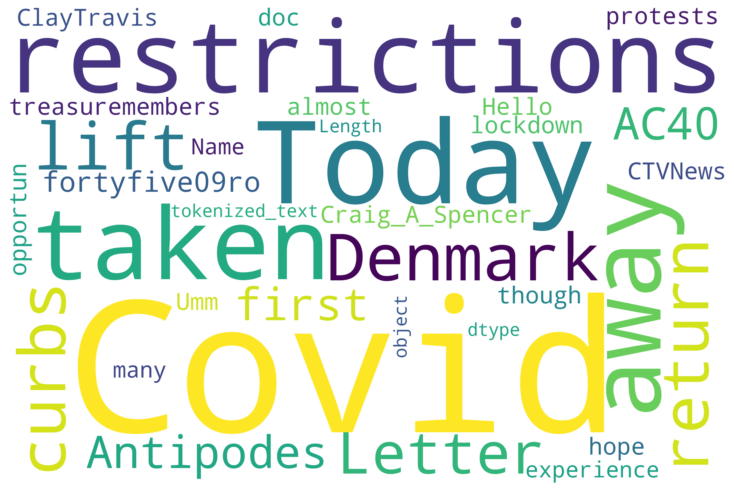

In [9]:
text = df.tokenized_text
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords=stopwords).generate(str(text))
fig = plt.figure(
    figsize = (10, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

<h5 align='right'>The tweets most RT</h5>

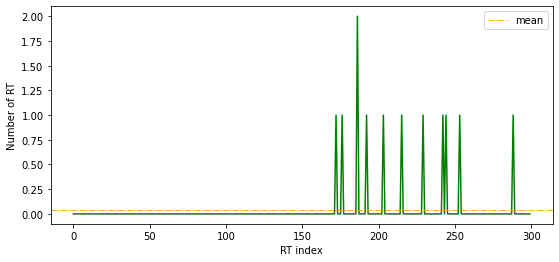

In [12]:
plt.figure(figsize=(9,4))
plt.plot(df['retweet_count'], color='green')
plt.axhline(df['retweet_count'].mean(), color='orange', lw='.9',linestyle='-.', label='mean')
plt.xlabel('RT index')
plt.ylabel('Number of RT')
plt.legend(loc='upper right')
#plt.savefig('EN_RT.jpg')

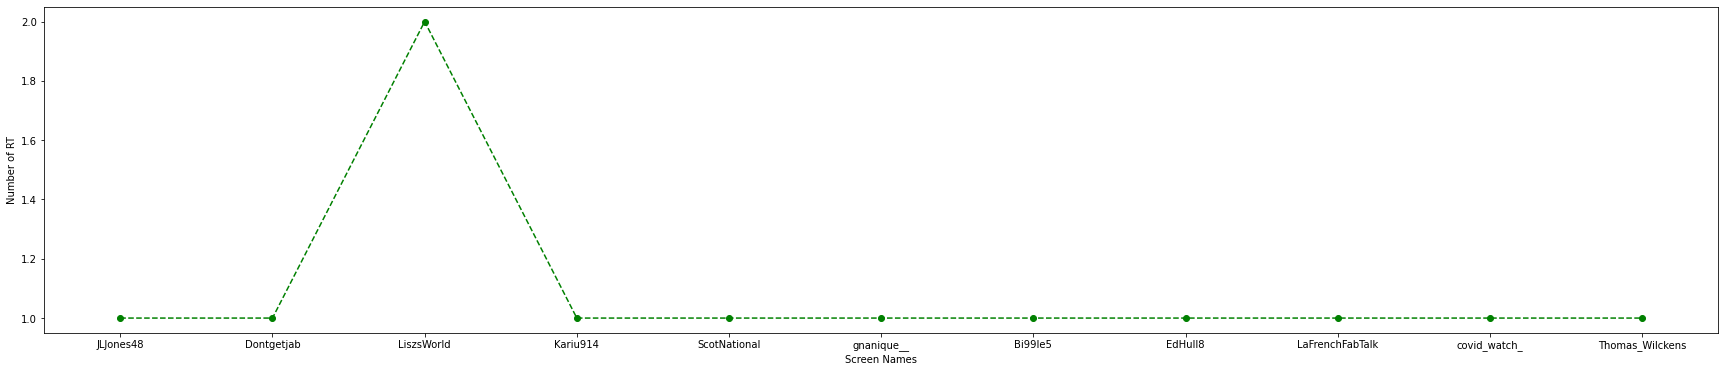

In [13]:
RTmean = (df['retweet_count'] > df['retweet_count'].mean())
RTmean = df[RTmean]
plt.figure(figsize=(30,6))
plt.plot(RTmean['screen_name'],RTmean['retweet_count'], 'go--')
plt.xlabel('Screen Names')
plt.ylabel('Number of RT')
#plt.savefig('EN_RTaboveMean.jpg')

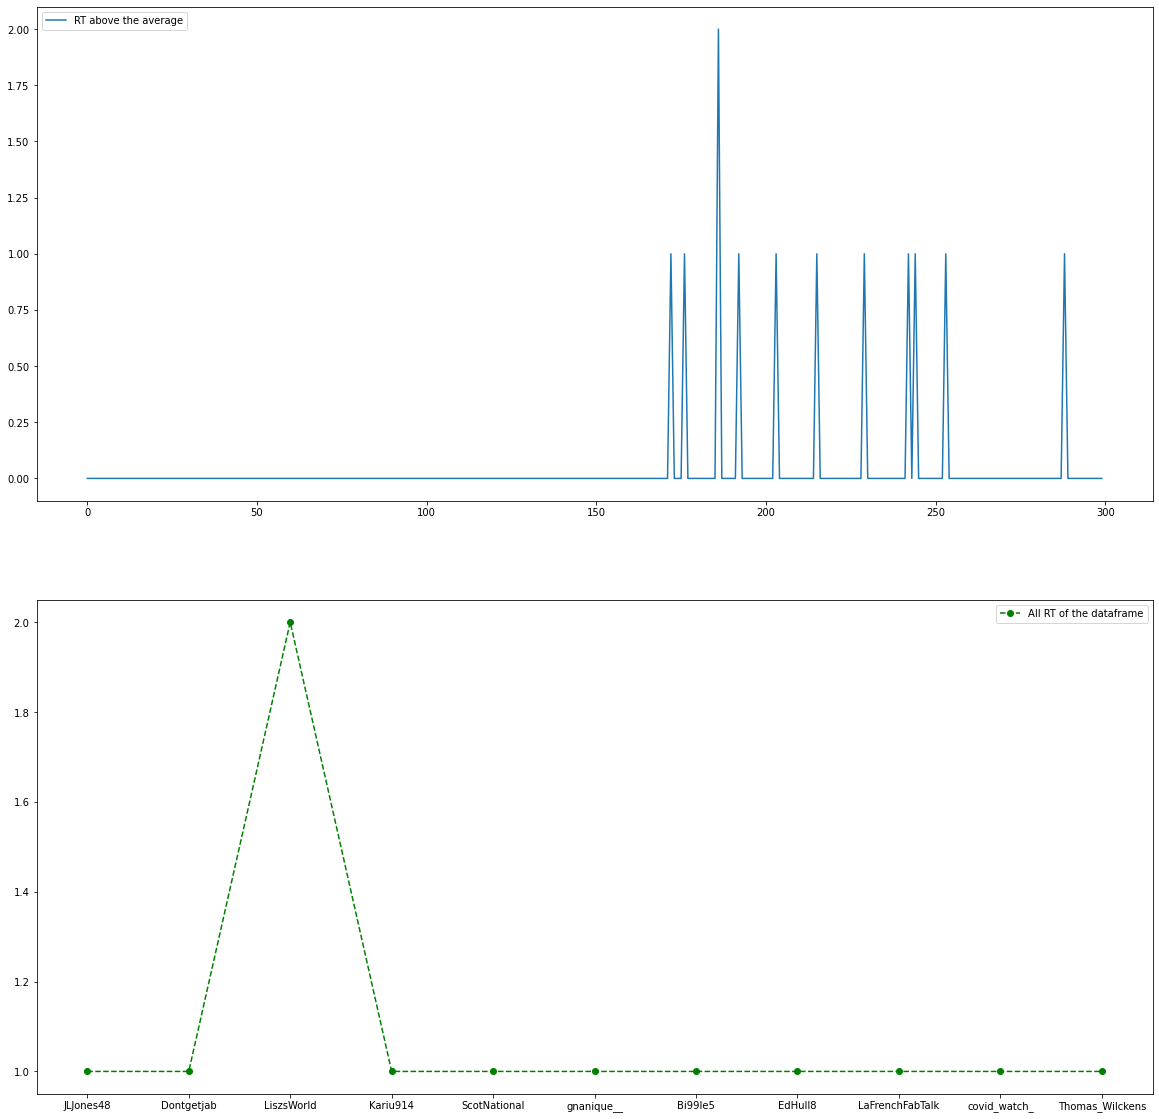

In [36]:
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
plt.plot(df['retweet_count'])
plt.legend(['RT above the average'], loc='upper left')

plt.subplot(2,1,2)
plt.plot(RTmean['screen_name'], RTmean['retweet_count'], 'go--')
plt.legend(['All RT of the dataframe'], loc='upper right')
plt.savefig('EN_RT_AllandAboveMean.jpg')

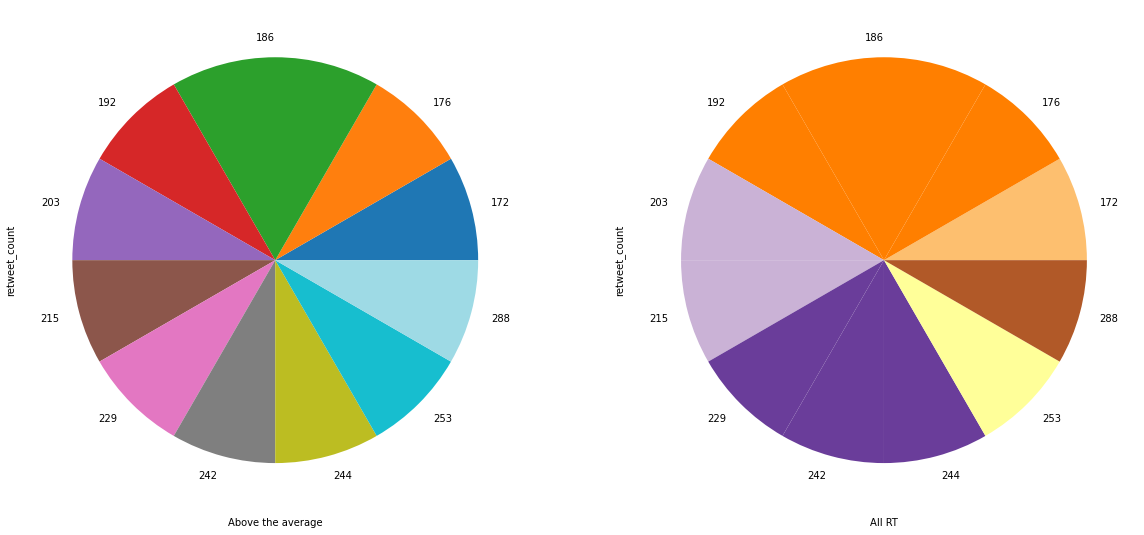

In [72]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
RTmean['retweet_count'].plot(kind='pie', colormap='tab20')
plt.xlabel('Above the average')

plt.subplot(1,2,2)
df['retweet_count'].plot(kind='pie', colormap='Paired')
plt.xlabel('All RT')
plt.savefig('EN_RT_aboveMean_audience.jpg')

<h5 align='right'>WordCloud with all the RT above the average</h5>

In [40]:
RTmean['tokenized_text'] = RTmean.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
stopwords = nltk.corpus.stopwords.words('english')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


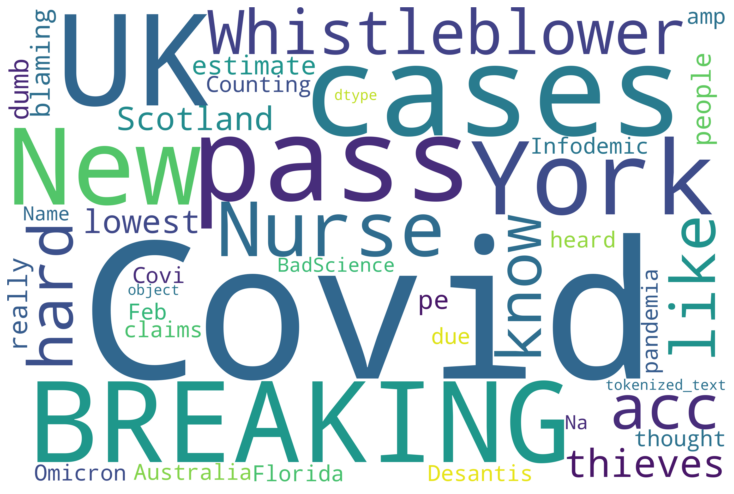

In [58]:
text = RTmean.tokenized_text
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords=stopwords).generate(str(text))
fig = plt.figure(
    figsize = (10, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

<h5 align='right'>The verified accounts</h5>

Text(0, 0.5, 'Number of Tweets')

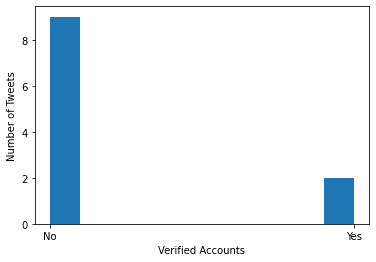

In [59]:
plt.hist(RTmean['verified'])
plt.xlabel('Verified Accounts')
plt.ylabel('Number of Tweets')

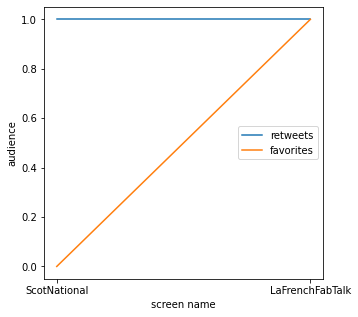

In [62]:
VerY = (RTmean['verified']=='Yes')
VerY = RTmean[VerY]
plt.figure(figsize=(5,5))
plt.plot(VerY['screen_name'], VerY['retweet_count'], label='retweets')
plt.plot(VerY['screen_name'], VerY['favorite_count'], label='favorites')
plt.legend(loc='right')
plt.xlabel('screen name')
plt.ylabel('audience')
plt.savefig('RT_byVerifiedAccounts.jpg')

In [63]:
list(VerY.text)

['Scotland has the lowest estimate for percentage of people testing positive for Covid in the UK, new figures reveal\n\nhttps://t.co/OazVl9xSkH',
 '👏🏭\U0001f9be After the pandemia due to the Covid, the upturn is confirmed regarding #employment! In 2022, the 125 major recr… https://t.co/qCrgMjdKvU']

In [64]:
VerY

,created_at,text,source,favorite_count,retweet_count,location,verified,screen_name,tokenized_text
203,2022-01-27 10:47:48+00:00,Scotland has the lowest estimate for percentag...,Tw Web AP,0,1,Scotland,Yes,ScotNational,"[Scotland, has, the, lowest, estimate, for, pe..."
244,2022-01-27 10:47:25+00:00,"👏🏭🦾 After the pandemia due to the Covid, the u...",Tw Web AP,1,1,NaN,Yes,LaFrenchFabTalk,"[👏🏭🦾, After, the, pandemia, due, to, the, Covi..."


<h5 align='right'>The not verified accounts</h5>

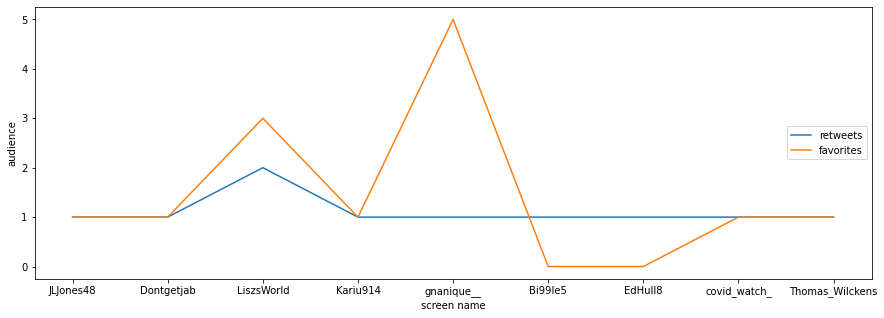

In [71]:
VerN = (RTmean['verified']=='No')
VerN = RTmean[VerN]
plt.figure(figsize=(15,5))
plt.plot(VerN['screen_name'], VerN['retweet_count'], label='retweets')
plt.plot(VerN['screen_name'], VerN['favorite_count'], label='favorites')
plt.legend(loc='right')
plt.xlabel('screen name')
plt.ylabel('audience')
plt.savefig('EN_RT_byNotVerifiedAccounts.jpg')

<h5 align='right'>The sources frequency used by EN-tweeters</h5>

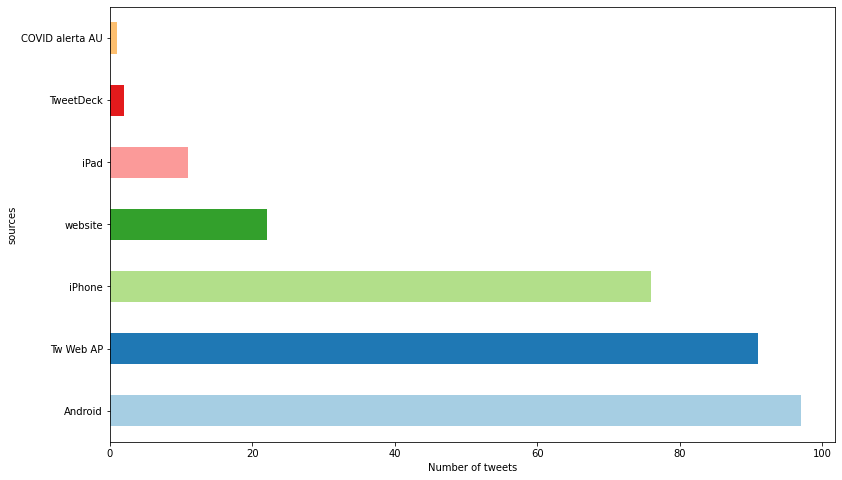

In [66]:
df.source.value_counts().plot(kind='barh', figsize=(13,8),
                              color=plt.cm.Paired(np.arange(len(df['source']))))
plt.xlabel('Number of tweets')
plt.ylabel('sources')
plt.savefig('EN_twitter_source.jpg')